# Example 1. Linear Regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [2]:
np.random.seed(1337)
np.set_printoptions(3)

In [3]:
# we can create toy regression dataset using sklearn.datasets.make_regression but we cannot control slope

# configurations
n_samples = 100
w_true = np.array([1.5])
b_true = 0.5
noise_scale = 1.0

# Generate input features
n_features = len(w_true)
x = np.random.randn(n_samples, n_features)

# Generate target values with noise
noise = np.random.randn(n_samples) * noise_scale
t = x @ w_true + b_true + noise

Text(0, 0.5, 'Output, $x$')

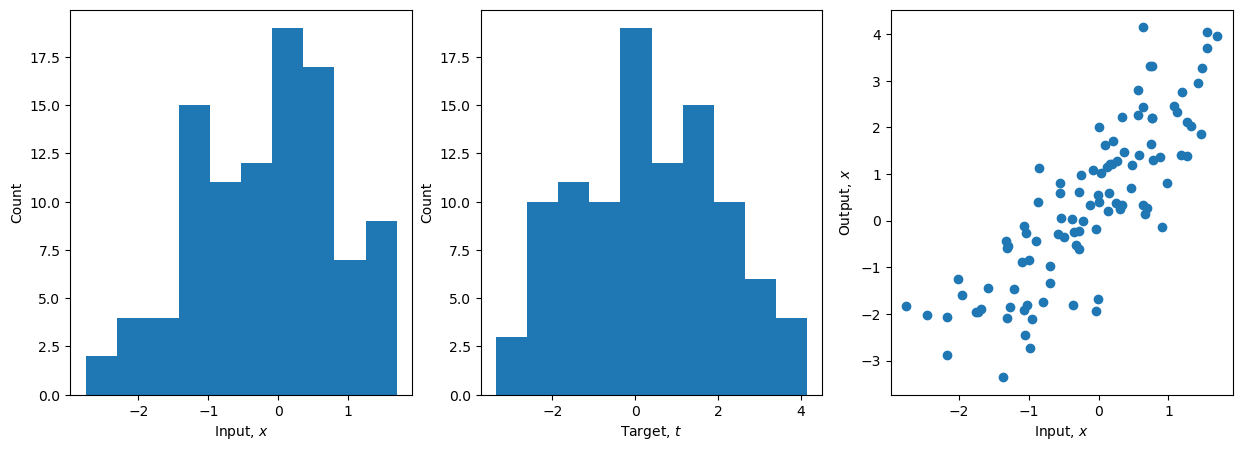

In [4]:
fig, axarr = plt.subplots(figsize=(15, 5), ncols=3)
axarr[0].hist(x[:, 0])
axarr[0].set_xlabel(r'Input, $x$')
axarr[0].set_ylabel('Count')

axarr[1].hist(t)
axarr[1].set_xlabel(r'Target, $t$')
axarr[1].set_ylabel('Count')

axarr[2].scatter(x, t)
axarr[2].set_xlabel(r'Input, $x$')
axarr[2].set_ylabel(r'Output, $x$')

In [5]:
# Linear regression solves a direct analytical solution, so model selection is not required and a validation set is unnecessary.
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2)
print(f'{x_train.shape=}, {t_train.shape=}')
print(f'{x_test.shape=}, {t_test.shape=}')

x_train.shape=(80, 1), t_train.shape=(80,)
x_test.shape=(20, 1), t_test.shape=(20,)


In [6]:
# Create a linear regression model
model = LinearRegression()

In [7]:
# Train the model on training data
model.fit(X=x_train, y=t_train)

LinearRegression()

In [8]:
y_test = model.predict(x_test)
mse_test = mean_squared_error(t_test, y_test)

w_pred = model.coef_
b_pred = model.intercept_

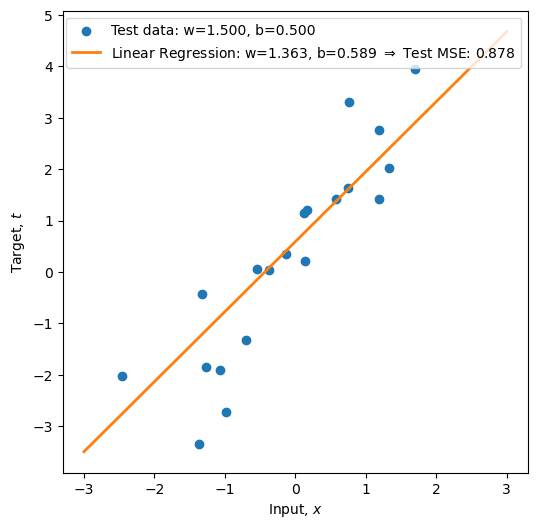

In [12]:
data_label = f'Test data: w={w_true.item():.3f}, b={b_true:.3f}'
model_label = rf'Linear Regression: w={w_pred.item():.3f}, b={b_pred.item():.3f} $\Rightarrow$ Test MSE: {mse_test:.3f}'

x_vis = np.linspace(-3, 3).reshape(-1, 1)
y_vis = model.predict(x_vis)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x_test, t_test, label=data_label, color='tab:blue')
ax.plot(x_vis, y_vis, label=model_label, linewidth=2, color='tab:orange')
ax.set_xlabel(r"Input, $x$")
ax.set_ylabel(r"Target, $t$")
ax.legend()